In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.layers import Conv2D,Conv2DTranspose,MaxPooling2D,UpSampling2D
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
x_train_noisy =x_train + np.random.normal(0,0.2 , size=x_train.shape)
x_test_noisy =x_test + np.random.normal(0,0.2 , size=x_test.shape)

In [0]:
x_train_noisy = np.clip(x_train_noisy,0.0,1.0)
x_test_noisy = np.clip(x_test_noisy,0.0,1.0)

Text(0.5, 1.0, 'Noisy Image')

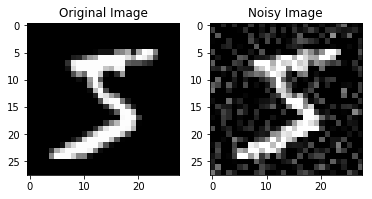

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(x_train[0], cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(x_train_noisy[0],cmap='gray')
ax2.set_title('Noisy Image')

In [0]:
image_size = 28
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train_noisy = np.reshape(x_train_noisy, [-1, image_size, image_size, 1])
x_test_noisy = np.reshape(x_test_noisy, [-1, image_size, image_size, 1])

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train.dtype

dtype('float32')

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1),name='1stconv'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same',name='2ndconv'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',name='3rdconv'))
model.add(Conv2DTranspose(128,(3,3),activation='relu',padding='same',name='1stdeconv'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(64,(3,3),activation='relu',padding='same',name='2nddeconv'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(1,(3,3),activation='relu',padding='same',name='3rddeconv'))

In [0]:
model.compile('adam','mse', metrics=['accuracy'])

In [15]:
model.fit(x_train_noisy,x_train,batch_size = 128, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.0043 - acc: 0.8153
Epoch 2/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0038 - acc: 0.8154
Epoch 3/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0035 - acc: 0.8154
Epoch 4/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0034 - acc: 0.8154
Epoch 5/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0032 - acc: 0.8154
Epoch 6/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0031 - acc: 0.8154
Epoch 7/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0031 - acc: 0.8154
Epoch 8/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0030 - acc: 0.8154
Epoch 9/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0030 - acc: 0.8154
Epoch 10/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.00

In [0]:
model.save('mnist_autoencoder.h5')

In [0]:
pred = model.predict(x_test_noisy)

In [19]:
pred[0].shape

(28, 28, 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Original Image')

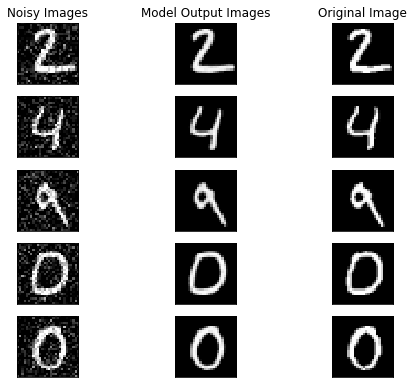

In [33]:
plt.rcParams["figure.figsize"] = (8,20)
for i in range(1,14,3):
  plt.subplot(15,3,i)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(15,3,i+1)
  plt.imshow(pred[i].reshape(28,28),cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(15,3,i+2)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.subplot(15,3,1)
plt.title('Noisy Images')
plt.subplot(15,3,2)
plt.title('Model Output Images')
plt.subplot(15,3,3)
plt.title('Original Image')